In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# shapefile
gdf_pop = gpd.read_file('../data/Taxi_Population/Taxi_Population.shp')
gdf_pop.head()

,borough,location_i,objectid,shape_area,shape_leng,zone,trips,trips_ly,yoy,Total Popu,Working Po,Essential_,areaKM2,PopDensity,geometry
0,EWR,1.0,1.0,0.000782,0.116357,Newark Airport,6.15625,86.50000,-0.928829,NaN,NaN,NaN,7.343,NaN,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2.0,2.0,0.004866,0.433470,Jamaica Bay,0.43750,1.03125,-0.575758,0.0,0.0,0.0,13.370,0.0,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3.0,3.0,0.000314,0.084341,Allerton/Pelham Gardens,610.15625,1465.62500,-0.583689,31097.0,14088.0,6877.0,2.944,10562.8,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4.0,4.0,0.000112,0.043567,Alphabet City,497.96875,3736.59375,-0.866732,25076.0,11327.0,2841.0,0.745,33659.1,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5.0,5.0,0.000498,0.092146,Arden Heights,47.34375,163.87500,-0.711098,26887.0,12192.0,4612.0,4.684,5740.2,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."


In [4]:
gdf_pop['Total Popu'].sum()

8415570.0

In [5]:
gdf_pop['Working Po'].sum()

4081620.0

In [7]:
gdf_pop['Essential_'].sum()

1681422.0

In [8]:
gdf_pop['ratio'] = gdf_pop['Essential_'] / gdf_pop['Total Popu']

Text(0.5, 1.0, '# of Trips YoY: Taxi and FHV')

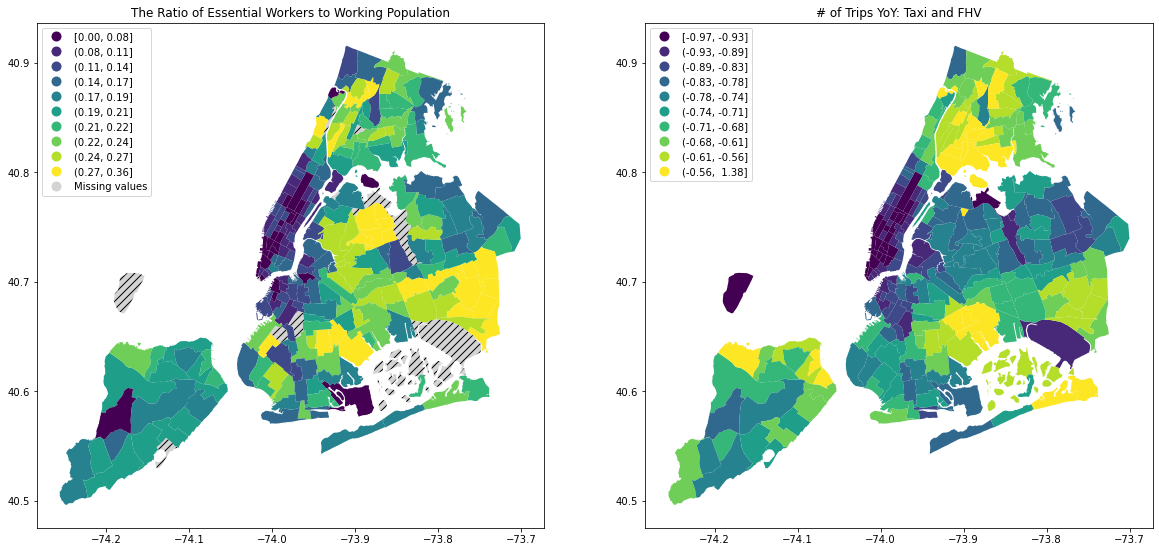

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdf_pop.plot(ax=axes[0], column='ratio', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'}, missing_kwds={
                "color": "lightgrey", ## what to do with missing values
                # "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values"})

gdf_pop.plot(ax=axes[1], column='yoy', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

axes[0].set_title('The Ratio of Essential Workers to Working Population')
axes[1].set_title('# of Trips YoY: Taxi and FHV')